In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt # to plot charts
import seaborn as sns # for data visualization

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
#Load diabetes dataset
df = pd.read_csv('diabetes.csv')

In [3]:
#display dataset
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
##Getting total number of columns in the dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
##Getting the info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Get shape of dataset
df.shape

(768, 9)

In [7]:
# To know more about dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The mean age is 33 and min age is 21 and max age of people is 81.

# Missing Value Analysis

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

--There isn't missing values in dataset.

-- Following columns or variables have an invalid zero value : Skin thickness, Insulin, Glucose , Blood Pressure, BMI. So its better to replace zeros with suitable values , after that counting would be easier.

--Replace 0 values with either mean or median values of specific column

In [9]:
# Correct 0 values in SkinThickness

df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())

In [10]:
# Correct 0 values in Insulin 
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

In [11]:
# Correct 0 values in Glucose
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df.Glucose.value_counts()

Glucose
99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: count, Length: 136, dtype: int64

In [12]:
# Correct 0 values in BloodPressure
df['BloodPressure'] =df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [13]:
# Correct 0 values in BMI
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [14]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
#Display preprocessed dataset
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


# Data Visualization

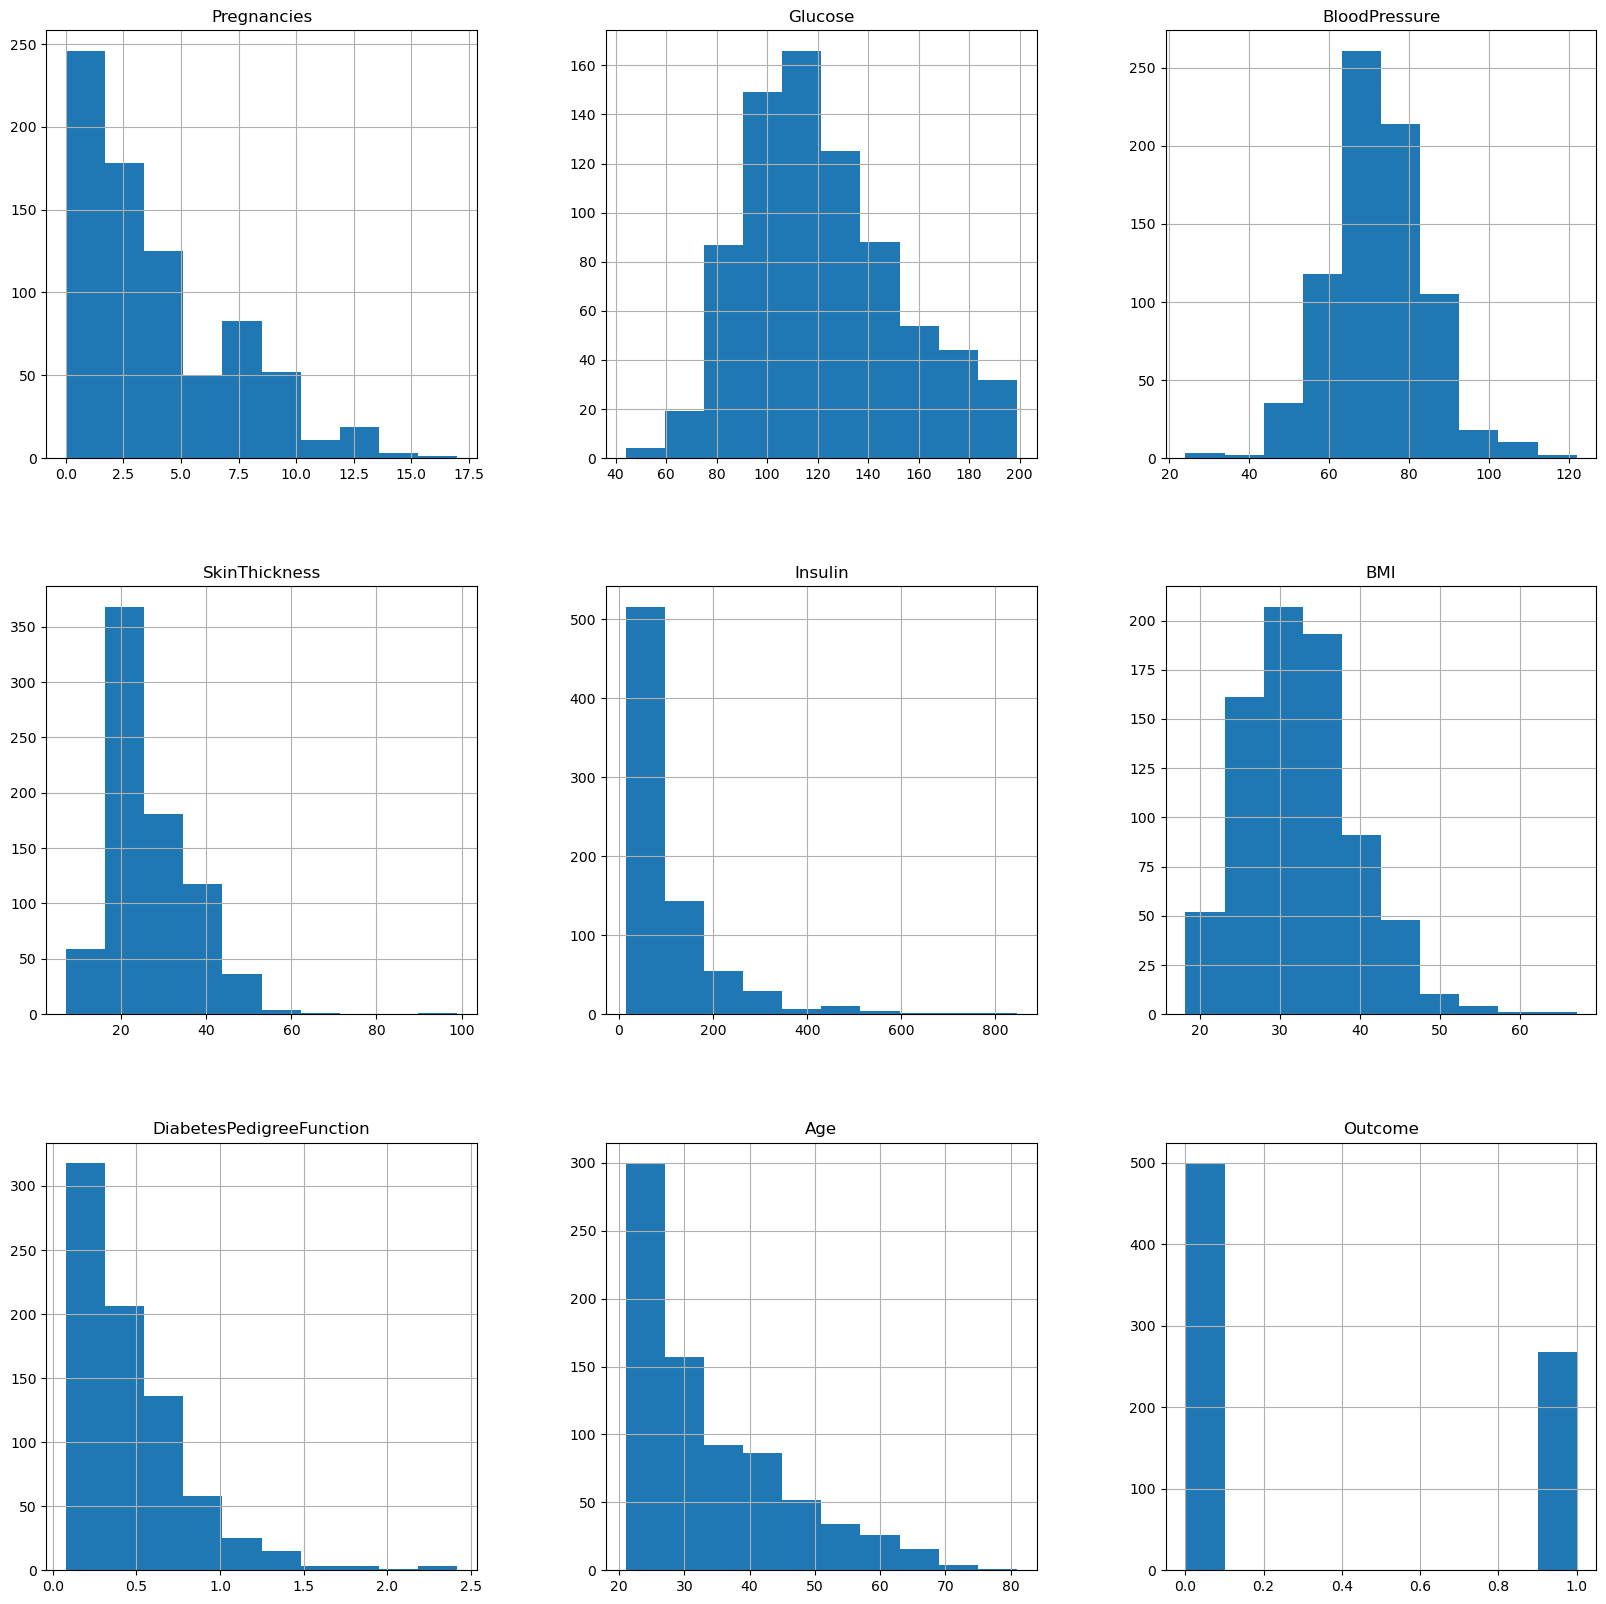

In [16]:
#data Visualization plot
p= df.hist(figsize=(20,20))

Outcome
0    500
1    268
Name: count, dtype: int64


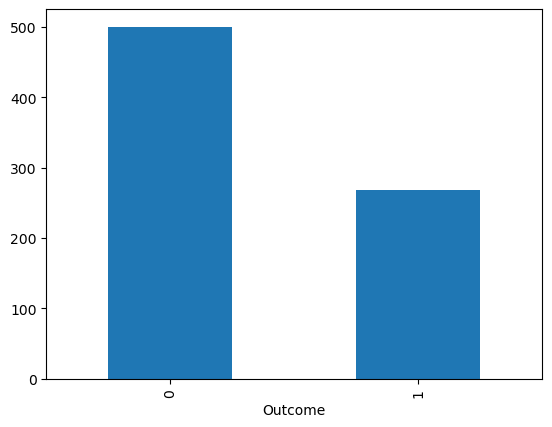

In [17]:
#Checking balance of the data
color_wheel = {1:"#d6d6d6",2:"#g7g7g7"}
colors=df["Outcome"].map(lambda x:color_wheel.get(x+1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

The graph shows that the data biased towards data points having outcome value as 0 where it means that diabetes was not present actually . The number of non diabetes is almost twice the number of diabetes patients.

# Correlation between all the features

Text(0.5, 1.0, ' Corelation Of Columns')

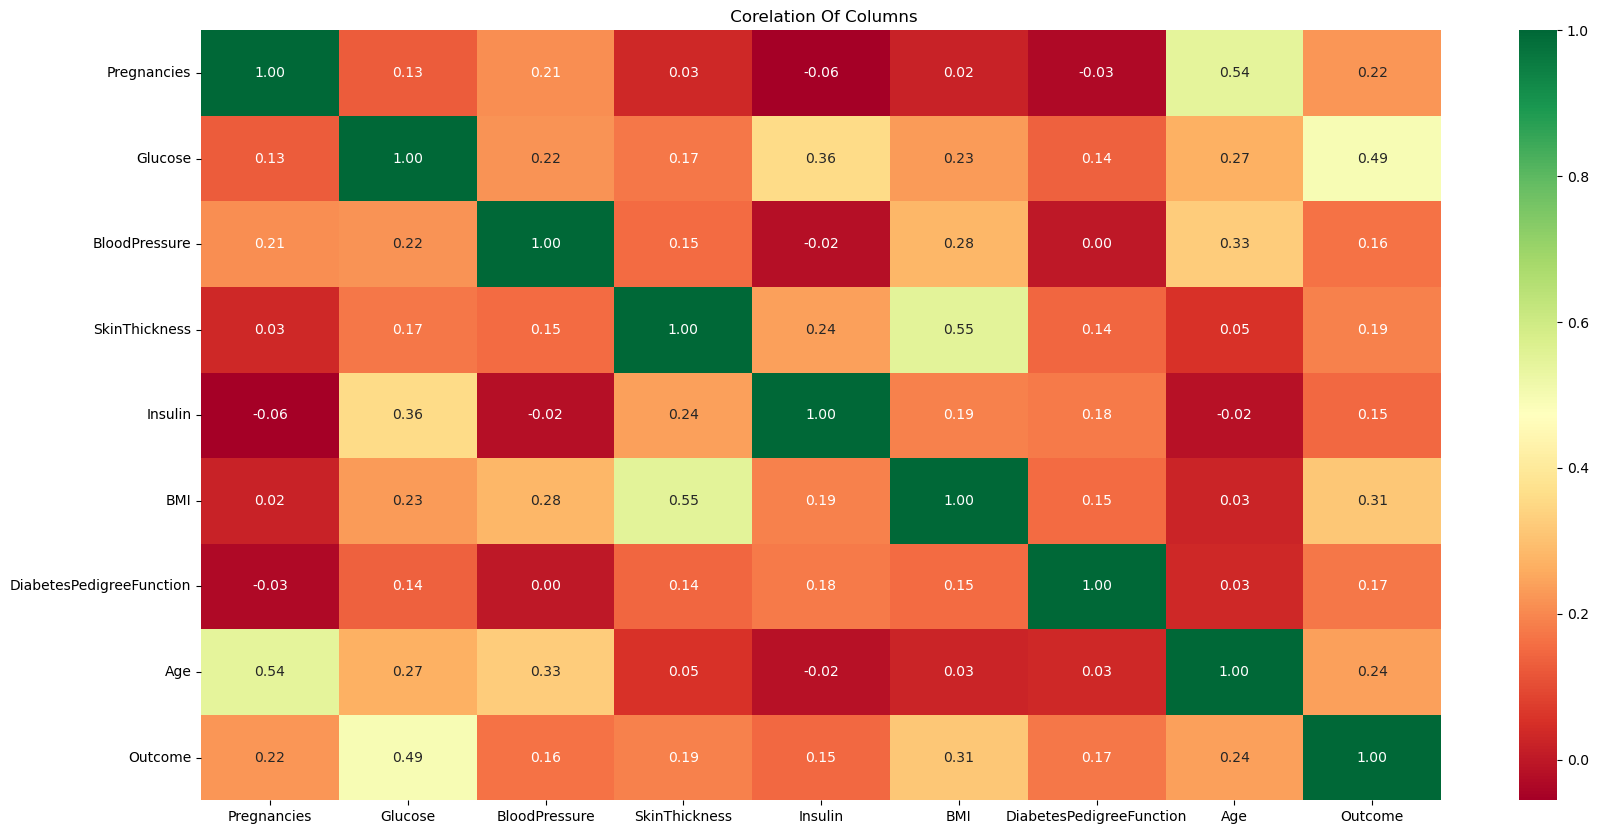

In [18]:
# Corelation

plt.figure(figsize=(20,10))
corr_columns = df.corr()
sns.heatmap(corr_columns,annot=True, fmt = ".2f", cmap = "RdYlGn")
plt.title(' Corelation Of Columns')

From graph observed that Pregnancies,Glucose,BMI, Age are correlated with Outcome column.

In [19]:
df_copy = df.copy(deep=True)

In [20]:
#The features are scaled using StandardScaler to standardize them, which helps in improving the performance of some 
#machine learning algorithms.
sc_X = StandardScaler() 
X= pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis=1),), columns =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.549885,5.484909,-0.020496


In [21]:
y=df_copy.Outcome

In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Splitting the data into Train and Test

In [23]:
# Split the data into training and testing sets with a 70-30 ratio and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (537, 8)
Shape of X_test: (231, 8)
Shape of y_train: (537,)
Shape of y_test: (231,)


# Model Building

### Train an SVM model on the Diabetes dataset.

In [24]:
# Train Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
svm_predictions = svm_model.predict(X_test)

# Calculate accuracy of SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy of SVM model:", svm_accuracy)

Accuracy of SVM model: 0.7445887445887446


# Confusion Matrix

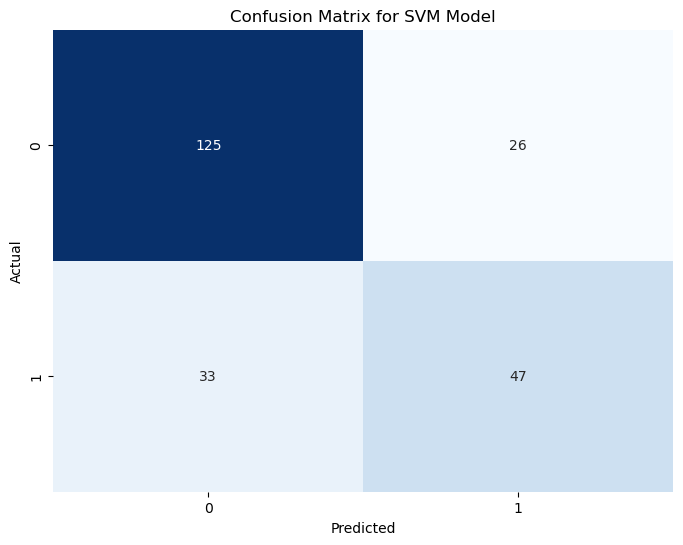

In [25]:
# Calculate confusion matrix for SVM model
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report

In [26]:
# Generate classification report for SVM model
svm_classification_report = classification_report(y_test, svm_predictions)

# Print classification report
print("Classification Report for SVM Model:")
print(svm_classification_report)

Classification Report for SVM Model:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# ROC - AUC Curve

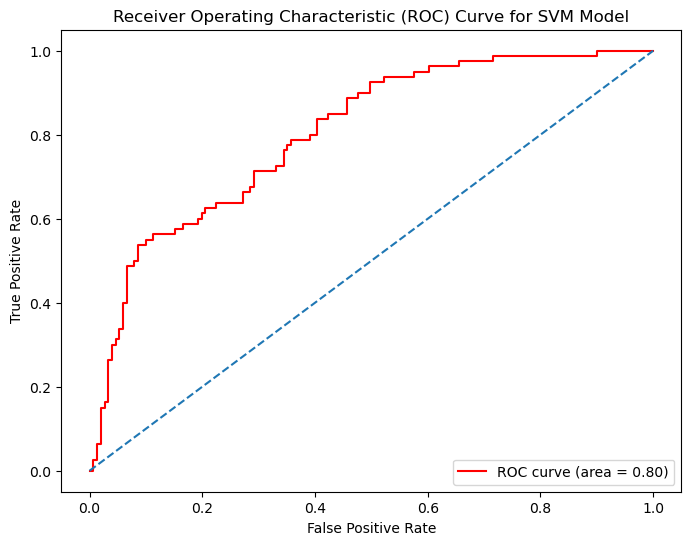

In [27]:
# Calculate the probabilities for the positive class (1)
svm_probs = svm_model.decision_function(X_test)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, svm_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Model')
plt.legend(loc="lower right")
plt.show()

In [28]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, svm_probs)
print("ROC AUC Score for SVM Model:", roc_auc)

ROC AUC Score for SVM Model: 0.8022350993377484


### Train a Decision Tree model on the Diabetes dataset.

In [29]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
dt_predictions = dt_model.predict(X_test)

# Calculate accuracy of Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy of Decision Tree model:", dt_accuracy)

Accuracy of Decision Tree model: 0.70995670995671


# Confusion Matrix

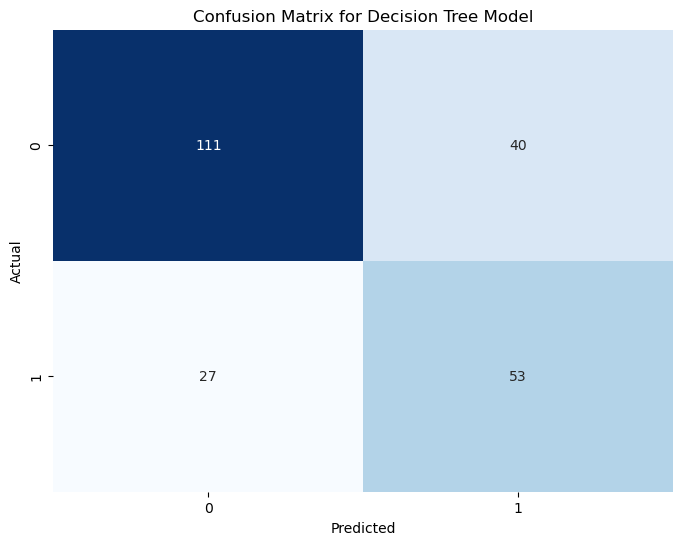

In [30]:
# Calculate confusion matrix for SVM model
conf_matrix_dt = confusion_matrix(y_test, dt_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report

In [31]:
# Generate classification report for SVM model
dt_classification_report = classification_report(y_test, dt_predictions)

# Print classification report
print("Classification Report for Decision Tree Model:")
print(dt_classification_report)

Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       151
           1       0.57      0.66      0.61        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



# ROC - AUC Curve

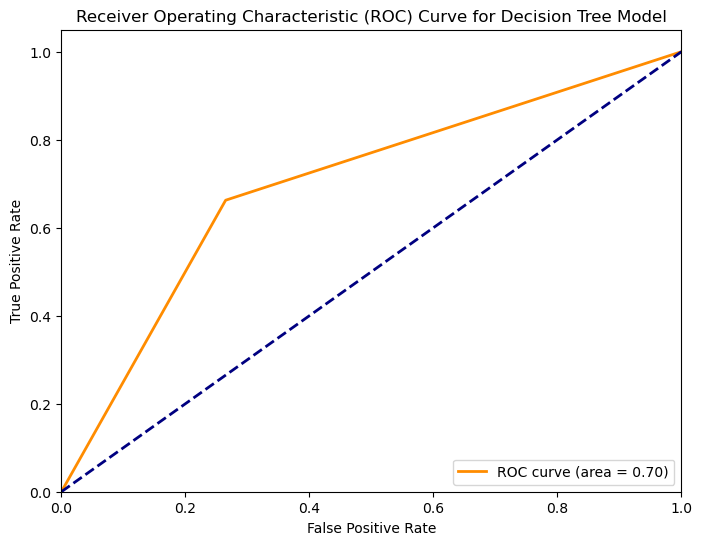

In [32]:
# Calculate the probabilities for the positive class (1)
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, dt_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Model')
plt.legend(loc="lower right")
plt.show()

In [33]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, dt_probs)
print("ROC AUC Score for Decision Tree Model:", roc_auc)

ROC AUC Score for Decision Tree Model: 0.6987996688741722


In [34]:
print("Accuracy of SVM model:", svm_accuracy)
print("Accuracy of Decision Tree model:", dt_accuracy)

Accuracy of SVM model: 0.7445887445887446
Accuracy of Decision Tree model: 0.70995670995671


### The SVM performs well beacuse it has the highest accuracy

### Select different feature sets and document the chosen features, model configurations, and test accuracies.

In [52]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

# Feature Set 1: 
selected_features1 = ['Pregnancies','Glucose','BloodPressure','SkinThickness']
X_s1 = data[selected_features1]
y_s1 = data['Outcome']
X_s1_train, X_s1_test, y_s1_train, y_s1_test = train_test_split(X_s1, y_s1, test_size=0.3, random_state=42)

# Train SVM model with Subset of features - 1
svm_model_s1 = SVC(kernel='linear')
svm_model_s1.fit(X_s1_train, y_s1_train)
svm_predictions_s1 = svm_model_s1.predict(X_s1_test)
svm_accuracy_s1 = accuracy_score(y_all_test, svm_predictions_s1)

# Train Decision Tree model with Subset of features - 1
dt_model_s1 = DecisionTreeClassifier()
dt_model_s1.fit(X_s1_train, y_s1_train)
dt_predictions_s1 = dt_model_s1.predict(X_s1_test)
dt_accuracy_s1 = accuracy_score(y_s1_test, dt_predictions_s1)



# Feature Set 2: 
selected_features2 = ['Pregnancies','Glucose','BMI','Age']
X_s2 = data[selected_features2]
y_s2 = data['Outcome']
X_s2_train, X_s2_test, y_s2_train, y_s2_test = train_test_split(X_s2, y_s2, test_size=0.3, random_state=42)

# Train SVM model with Subset of features - 2
svm_model_s2 = SVC(kernel='linear')
svm_model_s2.fit(X_s2_train, y_s2_train)
svm_predictions_s2 = svm_model_s2.predict(X_s2_test)
svm_accuracy_s2 = accuracy_score(y_all_test, svm_predictions_s2)

# Train Decision Tree model with Subset of features - 3
dt_model_s2 = DecisionTreeClassifier()
dt_model_s2.fit(X_s2_train, y_s2_train)
dt_predictions_s2 = dt_model_s2.predict(X_s2_test)
dt_accuracy_s2 = accuracy_score(y_s2_test, dt_predictions_s2)



# Feature Set 3: 
selected_features3 = ['Glucose','BloodPressure','BMI','Age']
X_s3 = data[selected_features3]
y_s3 = data['Outcome']
X_s3_train, X_s3_test, y_s3_train, y_s3_test = train_test_split(X_s3, y_s3, test_size=0.3, random_state=42)

# Train SVM model with Subset of features - 3
svm_model_s3 = SVC(kernel='linear')
svm_model_s3.fit(X_s3_train, y_s3_train)
svm_predictions_s3 = svm_model_s3.predict(X_s3_test)
svm_accuracy_s3 = accuracy_score(y_all_test, svm_predictions_s3)

# Train Decision Tree model with Subset of features - 3
dt_model_s3 = DecisionTreeClassifier()
dt_model_s3.fit(X_s3_train, y_s3_train)
dt_predictions_s3 = dt_model_s3.predict(X_s3_test)
dt_accuracy_s3 = accuracy_score(y_s3_test, dt_predictions_s3)



# The results
print("Results for Feature Set 1:",selected_features1)
print("SVM Test Accuracy:", svm_accuracy_s1)
print("Decision Tree Test Accuracy:", dt_accuracy_s1)

print("\nResults for Feature Set 2: ",selected_features2)
print("SVM Test Accuracy:", svm_accuracy_s2)
print("Decision Tree Test Accuracy:", dt_accuracy_s2)

print("\nResults for Feature Set 3: ",selected_features3)
print("SVM Test Accuracy:", svm_accuracy_s3)
print("Decision Tree Test Accuracy:", dt_accuracy_s3)

Results for Feature Set 1: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']
SVM Test Accuracy: 0.7489177489177489
Decision Tree Test Accuracy: 0.6147186147186147

Results for Feature Set 2:  ['Pregnancies', 'Glucose', 'BMI', 'Age']
SVM Test Accuracy: 0.7359307359307359
Decision Tree Test Accuracy: 0.6796536796536796

Results for Feature Set 3:  ['Glucose', 'BloodPressure', 'BMI', 'Age']
SVM Test Accuracy: 0.7445887445887446
Decision Tree Test Accuracy: 0.6883116883116883


The SVM model achieved higher test accuracy compared to the Decision Tree model for different feature sets.

In [ ]:
# Feature Importance using Decision Tree model
feature_importance = dt_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Important Features - Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Feature Importance using Decision Tree model
feature_importance = dt_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance - Decision Tree Model:")
print(feature_importance_df)